In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[1].shape

(28, 28)

In [8]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

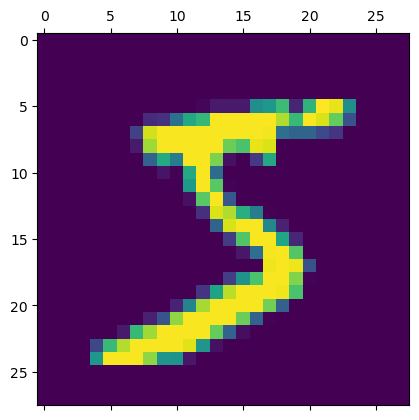

In [9]:
plt.matshow(X_train[0])

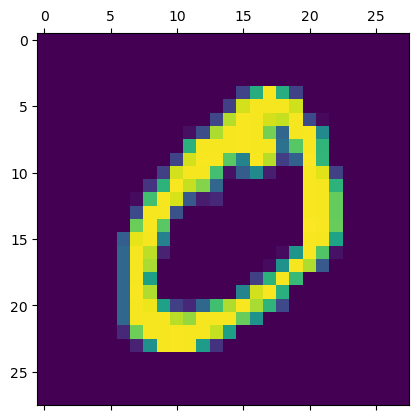

In [10]:
plt.matshow(X_train[1])

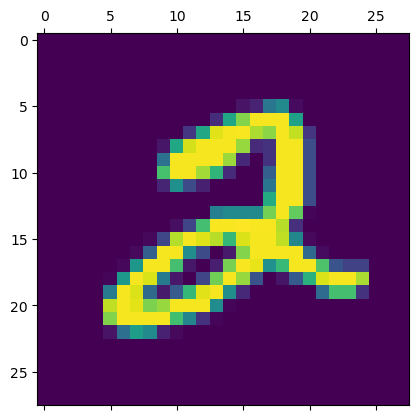

In [11]:
plt.matshow(X_train[5])

In [12]:
y_train[5]

2

In [13]:
y_train[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [14]:
X_train.shape


(60000, 28, 28)

In [15]:
X_train=X_train/255
X_test=X_test/255

In [16]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [17]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.4689 - accuracy: 0.8778
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2665 - accuracy: 0.9258


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2654 - accuracy: 0.9269


[0.2653866708278656, 0.9269000291824341]

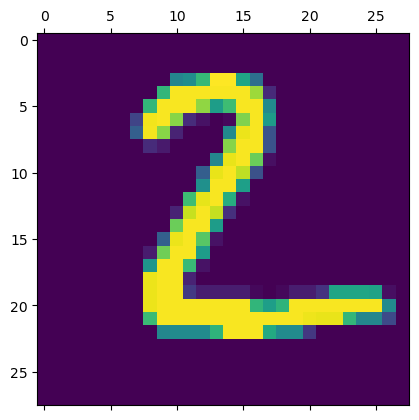

In [21]:
plt.matshow(X_test[1])

In [22]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [23]:
y_predicted[1]

array([4.3377811e-01, 3.7874670e-03, 9.9954116e-01, 3.8253039e-01,
       5.4392046e-10, 8.5399383e-01, 8.8215834e-01, 1.5004845e-12,
       1.5866472e-01, 2.5855815e-09], dtype=float32)

In [24]:
np.argmax(y_predicted[1])

2

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [26]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [27]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [28]:
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  930,   16,    7,    2,   12,   10,   36,    4],
       [   2,    0,   17,  930,    1,   21,    2,    9,   20,    8],
       [   2,    1,    5,    1,  923,    0,    8,    4,   10,   28],
       [  10,    2,    3,   39,   11,  771,   13,    5,   30,    8],
       [  13,    3,    6,    1,    7,   13,  910,    2,    3,    0],
       [   1,    6,   22,    8,    8,    0,    0,  946,    2,   35],
       [   6,   10,    6,   25,    9,   24,    9,    9,  868,    8],
       [  10,    7,    1,   12,   35,    6,    0,   17,   10,  911]])>

Text(95.72222222222221, 0.5, 'Truth')

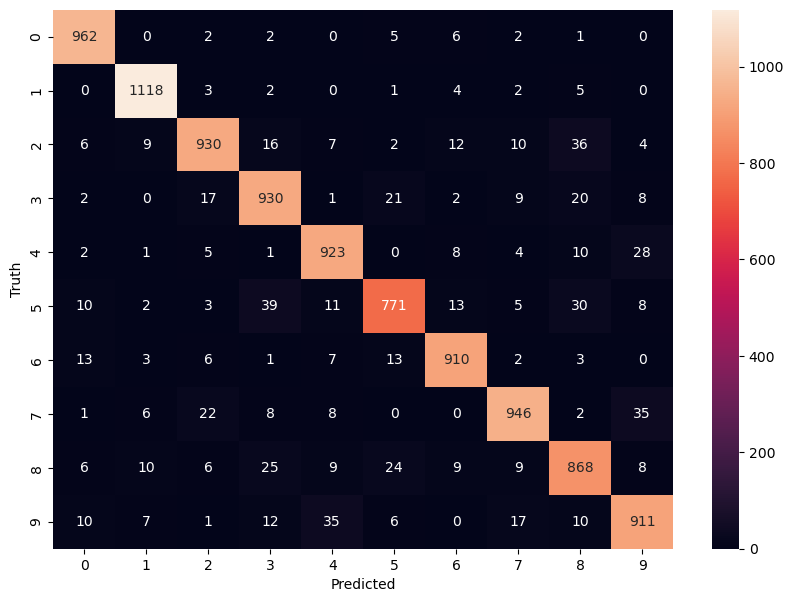

In [29]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2762 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1208 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0829 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0499 - accuracy: 0.9850


In [31]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9740


[0.08449580520391464, 0.9739999771118164]

313/313 [==============================] - 1s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

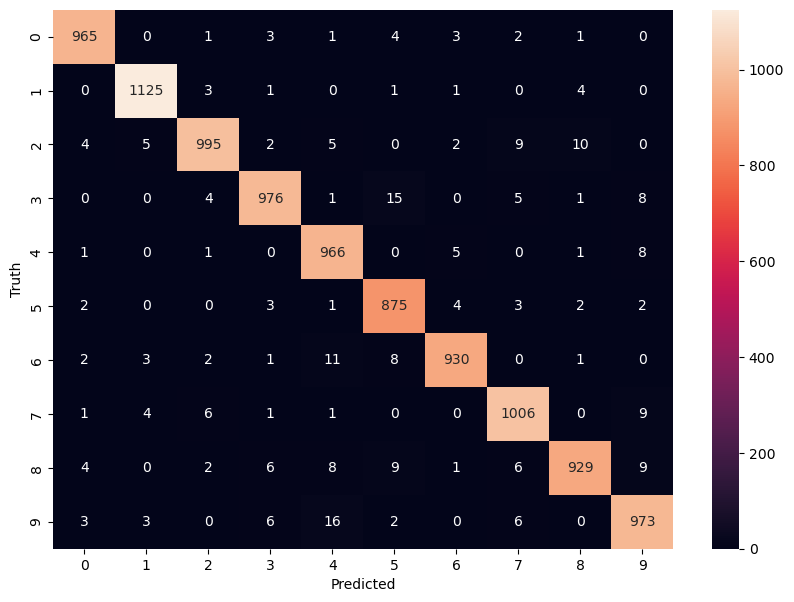

In [32]:
y_predicted=model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=10 , callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6654 - accuracy: 0.8300
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.9038
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.9157
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2709 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2490 - accuracy: 0.9298
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2310 - accuracy: 0.9352
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2153 - accuracy: 0.9394
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2018 - accuracy: 0.9431
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1897 - accuracy: 0.9466
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.178

In [34]:
import math
def sigma(x):
    return 1/(1+math.exp(-x))

In [35]:
sigma(1)

0.7310585786300049

In [36]:
sigma(100)

1.0

In [37]:
sigma(-56)

4.780892883885469e-25

In [38]:
def tanh(x):
    return (math.exp(x)-math.exp(-x))/(math.exp(x) + math.exp(-x))

In [39]:
tanh(-56)

-1.0

In [40]:
tanh(56)

1.0

In [41]:
tanh(50)

1.0

In [42]:
tanh(1)

0.7615941559557649

In [43]:
def relu(x):
    return max(0,x)

In [44]:
relu (-100)

0

In [45]:
relu(100)

100

In [46]:
def leaky_relu(x):
    return max(0.1*x,x)

In [47]:
leaky_relu(-10)

-1.0

In [48]:
leaky_relu(10)

10

In [51]:
pip install jupyter-tensorboard



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for uri-template from https://files.pythonhosted.org/packages/e7/00/3fca040d7cf8a32776d3d81a00c8ee7457e00f80c649f1e4a863c8321ae9/uri_template-1.3.0-py3-none-any.whl.metadata
  Running setup.py clean for jupyter-tensorboard
Failed to build jupyter-tensorboard


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [97 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\jupyter_tensorboard
  copying jupyter_tensorboard\api_handlers.py -> build\lib\jupyter_tensorboard
  copying jupyter_tensorboard\application.py -> build\lib\jupyter_tensorboard
  copying jupyter_tensorboard\handlers.py -> build\lib\jupyter_tensorboard
  copying jupyter_tensorboard\tensorboard_manager.py -> build\lib\jupyter_tensorboard
  copying jupyter_tensorboard\__init__.py -> build\lib\jupyter_tensorboard
  creating build\lib\jupyter_tensorboard\static
  copying jupyter_tensorboard\static\style.css -> build\lib\jupyter_tensorboard\static
  copying jupyter_tensorboard\static\tensorboardlist.js -> build\lib\jupyter_tensorboard\static
  copying jupyter_tensorboard\static\tree.js -> build\lib\jupyter_tensorboard\static
  running build_s

In [52]:
%load_ext tensorboard


In [53]:
%tensorboard --logdir logs/
